# Setup Environment

In [ ]:
# Upload file kaggle.json (API Key)
from google.colab import files
files.upload()

# Pindahkan API Key ke folder ~/.kaggle
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download dataset "goodreadsbooks"
# !kaggle datasets download jealousleopard/goodreadsbooks

# Download dataset "goodbooks-10k"
!kaggle datasets download zygmunt/goodbooks-10k

# Ekstrak dataset ke folder 'dataset'
!unzip goodbooks-10k.zip -d dataset

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/zygmunt/goodbooks-10k
License(s): CC-BY-SA-4.0
Archive:  goodbooks-10k.zip
  inflating: dataset/book_tags.csv   
  inflating: dataset/books.csv       
  inflating: dataset/ratings.csv     
  inflating: dataset/sample_book.xml  
  inflating: dataset/tags.csv        
  inflating: dataset/to_read.csv     


# Import Library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Data Understanding

In [3]:
import os

# Lihat daftar file di dalam folder
os.listdir('dataset')

['book_tags.csv',
 'ratings.csv',
 'tags.csv',
 'sample_book.xml',
 'to_read.csv',
 'books.csv']

Dataset ini terdiri atas 5 file csv dan 1 file xml seperti yang dapat dilihat di atas. Masing-masing menyimpan informasi berbeda yang saling melengkapi.

In [4]:
import pandas as pd

data_path = '/content/dataset/'
to_read = pd.read_csv(data_path + 'to_read.csv')
books = pd.read_csv(data_path + 'books.csv')
book_tags = pd.read_csv(data_path + 'book_tags.csv')
ratings = pd.read_csv(data_path + 'ratings.csv')
tags = pd.read_csv(data_path + 'tags.csv')

Pada kasus ini, data dengan format xml atau sample_book.xml tidak digunakan karena file-file lainnya sudah mencukupi untuk projek sistem rekomendasi buku ini.

## to_read

In [5]:
to_read.head()

,user_id,book_id
0,1,112
1,1,235
2,1,533
3,1,1198
4,1,1874


Dataset `to_read` berisi daftar buku yang ditandai sebagai "ingin dibaca" oleh pengguna. Format:
- user_id: ID pengguna
- book_id: ID buku

In [6]:
to_read.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912705 entries, 0 to 912704
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   user_id  912705 non-null  int64
 1   book_id  912705 non-null  int64
dtypes: int64(2)
memory usage: 13.9 MB


Berdasarkan output di atas, `to_read` memiliki 2 kolom dan 912.705 baris. Seluruh kolomnya bertipe int64 dan tidak terdapat missing values.

In [7]:
to_read.describe()

,user_id,book_id
count,912705.000000,912705.000000
mean,27668.980115,2454.739538
std,14775.096388,2626.359921
min,1.000000,1.000000
25%,15507.000000,360.000000
50%,27799.000000,1381.000000
75%,40220.000000,3843.000000
max,53424.000000,10000.000000


Fungsi describe() memberikan informasi statistik pada masing-masing kolom, antara lain:
- Count  adalah jumlah sampel pada data.
- Mean adalah nilai rata-rata.
- Std adalah standar deviasi.
- Min yaitu nilai minimum setiap kolom.
- 25% adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama.
- 50% adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
- 75% adalah kuartil ketiga.
- Max adalah nilai maksimum.

## books

In [8]:
books.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


Data `books` muerpakan inti dari dataset ini yang berisi metadata lengkap dari 10.000 buku. Beberapa kolom penting di dalamnya antara lain:
- id: ID internal buku dalam dataset
- book_id: Goodreads book ID
- best_book_id: Goodreads ID dari edisi buku yang paling populer
- work_id: ID dari “karya” buku (abstraksi dari semua edisi)
- authors: Penulis buku
- original_title, title: Judul asli dan judul yang ditampilkan
- language_code: Bahasa buku
- average_rating: Rata-rata rating dari pengguna
- ratings_count: Jumlah total rating
- image_url: URL sampul buku

In [9]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         10000 non-null  int64  
 1   book_id                    10000 non-null  int64  
 2   best_book_id               10000 non-null  int64  
 3   work_id                    10000 non-null  int64  
 4   books_count                10000 non-null  int64  
 5   isbn                       9300 non-null   object 
 6   isbn13                     9415 non-null   float64
 7   authors                    10000 non-null  object 
 8   original_publication_year  9979 non-null   float64
 9   original_title             9415 non-null   object 
 10  title                      10000 non-null  object 
 11  language_code              8916 non-null   object 
 12  average_rating             10000 non-null  float64
 13  ratings_count              10000 non-null  int6

`books` terdiri dari 10.000 baris dan 22 kolom. Namun, terdapat beberapa kolom yang memiliki missing values seperti isbn, isbn13, original_title, original_publication_year, dan language_code.

In [10]:
books.describe()

,id,book_id,best_book_id,work_id,books_count,isbn13,original_publication_year,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5
count,10000.00000,1.000000e+04,1.000000e+04,1.000000e+04,10000.000000,9.415000e+03,9979.000000,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04
mean,5000.50000,5.264697e+06,5.471214e+06,8.646183e+06,75.712700,9.755044e+12,1981.987674,4.002191,5.400124e+04,5.968732e+04,2919.955300,1345.040600,3110.885000,11475.893800,1.996570e+04,2.378981e+04
std,2886.89568,7.575462e+06,7.827330e+06,1.175106e+07,170.470728,4.428619e+11,152.576665,0.254427,1.573700e+05,1.678038e+05,6124.378132,6635.626263,9717.123578,28546.449183,5.144736e+04,7.976889e+04
min,1.00000,1.000000e+00,1.000000e+00,8.700000e+01,1.000000,1.951703e+08,-1750.000000,2.470000,2.716000e+03,5.510000e+03,3.000000,11.000000,30.000000,323.000000,7.500000e+02,7.540000e+02
25%,2500.75000,4.627575e+04,4.791175e+04,1.008841e+06,23.000000,9.780316e+12,1990.000000,3.850000,1.356875e+04,1.543875e+04,694.000000,196.000000,656.000000,3112.000000,5.405750e+03,5.334000e+03
50%,5000.50000,3.949655e+05,4.251235e+05,2.719524e+06,40.000000,9.780452e+12,2004.000000,4.020000,2.115550e+04,2.383250e+04,1402.000000,391.000000,1163.000000,4894.000000,8.269500e+03,8.836000e+03
75%,7500.25000,9.382225e+06,9.636112e+06,1.451775e+07,67.000000,9.780831e+12,2011.000000,4.180000,4.105350e+04,4.591500e+04,2744.250000,885.000000,2353.250000,9287.000000,1.602350e+04,1.730450e+04
max,10000.00000,3.328864e+07,3.553423e+07,5.639960e+07,3455.000000,9.790008e+12,2017.000000,4.820000,4.780653e+06,4.942365e+06,155254.000000,456191.000000,436802.000000,793319.000000,1.481305e+06,3.011543e+06


Fungsi describe() memberikan informasi statistik pada masing-masing kolom, antara lain:
- Count  adalah jumlah sampel pada data.
- Mean adalah nilai rata-rata.
- Std adalah standar deviasi.
- Min yaitu nilai minimum setiap kolom.
- 25% adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama.
- 50% adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
- 75% adalah kuartil ketiga.
- Max adalah nilai maksimum.

## book tags

In [11]:
book_tags.head()

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


`book_tags` berisi informasi tentang tag (atau genre/shelf) yang diberikan pengguna pada buku. Format:
- goodreads_book_id: ID buku dari Goodreads
- tag_id: ID tag
- count: Berapa kali tag tersebut diberikan ke buku

In [12]:
book_tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999912 entries, 0 to 999911
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   goodreads_book_id  999912 non-null  int64
 1   tag_id             999912 non-null  int64
 2   count              999912 non-null  int64
dtypes: int64(3)
memory usage: 22.9 MB


Berdasarkan output di atas, `book_tags` memiliki 3 kolom dan 999.912 baris. Seluruh kolomnya bertipe int64 dan tidak terdapat missing values.

In [13]:
book_tags.describe()

,goodreads_book_id,tag_id,count
count,9.999120e+05,999912.000000,999912.000000
mean,5.263442e+06,16324.527073,208.869633
std,7.574057e+06,9647.846196,3501.265173
min,1.000000e+00,0.000000,-1.000000
25%,4.622700e+04,8067.000000,7.000000
50%,3.948410e+05,15808.000000,15.000000
75%,9.378297e+06,24997.000000,40.000000
max,3.328864e+07,34251.000000,596234.000000


Fungsi describe() memberikan informasi statistik pada masing-masing kolom, antara lain:
- Count  adalah jumlah sampel pada data.
- Mean adalah nilai rata-rata.
- Std adalah standar deviasi.
- Min yaitu nilai minimum setiap kolom.
- 25% adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama.
- 50% adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
- 75% adalah kuartil ketiga.
- Max adalah nilai maksimum.

## ratings

In [14]:
ratings.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


`ratings` berisi data rating yang diberikan pengguna terhadap buku tertentu. Formatnya terdiri dari:
- user_id: ID pengguna
- book_id: ID buku yang dirating
- rating: Nilai rating yang diberikan (skala 1–5)

In [15]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981756 entries, 0 to 981755
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   book_id  981756 non-null  int64
 1   user_id  981756 non-null  int64
 2   rating   981756 non-null  int64
dtypes: int64(3)
memory usage: 22.5 MB


Berdasarkan output di atas, `ratings` memiliki 3 kolom dan 981.756 baris. Seluruh kolomnya bertipe int64 dan tidak terdapat missing values.

In [16]:
ratings.describe()

,book_id,user_id,rating
count,981756.000000,981756.000000,981756.000000
mean,4943.275636,25616.759933,3.856534
std,2873.207415,15228.338826,0.983941
min,1.000000,1.000000,1.000000
25%,2457.000000,12372.000000,3.000000
50%,4921.000000,25077.000000,4.000000
75%,7414.000000,38572.000000,5.000000
max,10000.000000,53424.000000,5.000000


Fungsi describe() memberikan informasi statistik pada masing-masing kolom, antara lain:
- Count  adalah jumlah sampel pada data.
- Mean adalah nilai rata-rata.
- Std adalah standar deviasi.
- Min yaitu nilai minimum setiap kolom.
- 25% adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama.
- 50% adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
- 75% adalah kuartil ketiga.
- Max adalah nilai maksimum.

## tags

In [17]:
tags.head()

,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-


`tags` merupakan kamus atau lookup untuk tag_id yang digunakan pada `book_tags`. Format:
- tag_id: ID tag
- tag_name: Nama dari tag

In [18]:
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34252 entries, 0 to 34251
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tag_id    34252 non-null  int64 
 1   tag_name  34252 non-null  object
dtypes: int64(1), object(1)
memory usage: 535.3+ KB


Berdasarkan output di atas, `tags` memiliki 2 kolom dan 34.252 baris. Satu kolom bertipe int64 dan lainnya bertipe object dan tidak terdapat missing values.

In [19]:
tags.describe()

,tag_id
count,34252.000000
mean,17125.500000
std,9887.845047
min,0.000000
25%,8562.750000
50%,17125.500000
75%,25688.250000
max,34251.000000


Fungsi describe() memberikan informasi statistik pada masing-masing kolom, antara lain:
- Count  adalah jumlah sampel pada data.
- Mean adalah nilai rata-rata.
- Std adalah standar deviasi.
- Min yaitu nilai minimum setiap kolom.
- 25% adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama.
- 50% adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
- 75% adalah kuartil ketiga.
- Max adalah nilai maksimum.

# Data Preparation

## Penggabungan Data

Pada tahap ini akan dilakukan penggabungan data. Hal yang akan digabungkan pada dataset ini adalah data deskriptif buku dan juga data rating. Permodelan akan menggunakan data deskriptif buku dan evaluasinya akan melibatkan juga data rating dari pengguna.

### 1. `books_cb`

Untuk pemodelan nanti, kita butuh informasi deskriptif dari buku, seperti:
- Judul (title)
- Penulis (authors)
- Genre/tag (gabungan dari book_tags.csv dan tags.csv)
- Rata-rata rating (average_rating) sebagai informasi tambahan.

In [20]:
# Merge book_tags dengan tags untuk dapatkan nama tag
book_tags_merged = book_tags.merge(tags, on='tag_id')

# Group tags berdasarkan goodreads_book_id dan gabungkan tag_name jadi 1 string per buku
tags_per_book = book_tags_merged.groupby('goodreads_book_id')['tag_name'].apply(lambda x: ' '.join(x)).reset_index()
tags_per_book.columns = ['goodreads_book_id', 'tags']

Gabungkan book_tags dan tags untuk dapatkan nama tag

In [ ]:
# Gabungkan tags ke books berdasarkan book_id
books_content = books.merge(tags_per_book, left_on='book_id', right_on='goodreads_book_id', how='left')

Gabungkan ke books berdasarkan book_id dan goodreads_book_id

In [22]:
books_cb = books_content[['book_id', 'title', 'authors', 'average_rating', 'tags']]
books_cb = books_cb.dropna(subset=['tags'])  # Hapus buku yang tidak punya tag

Pilih kolom penting untuk content-based filtering

In [23]:
books_cb.head()

,book_id,title,authors,average_rating,tags
0,2767052,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,4.34,favorites currently-reading young-adult fictio...
1,3,Harry Potter and the Sorcerer's Stone (Harry P...,"J.K. Rowling, Mary GrandPré",4.44,to-read favorites fantasy currently-reading yo...
2,41865,"Twilight (Twilight, #1)",Stephenie Meyer,3.57,young-adult fantasy favorites vampires ya fict...
3,2657,To Kill a Mockingbird,Harper Lee,4.25,classics favorites to-read classic historical-...
4,4671,The Great Gatsby,F. Scott Fitzgerald,3.89,classics favorites fiction classic books-i-own...


In [24]:
# Cek missing value
books_cb.isnull().sum()

,0
book_id,0
title,0
authors,0
average_rating,0
tags,0


Tidak terdapat missing values.

In [25]:
# Cek duplikat
books_cb.duplicated(subset='book_id').sum()

np.int64(0)

Tidak terdapat data duplikat.

### 2. `ratings_cb`

Pada data rating, hal terpenting adalah informasi terkait:
- `user_id`
- `book_id`
- `rating`

In [26]:
ratings_cb = ratings[['user_id', 'book_id', 'rating']]

In [27]:
ratings_cb = ratings_cb[ratings_cb['book_id'].isin(books_cb['book_id'])]

Data rating yang diambil adalah rating yang diberikan user pada buku-buku yang terdapat pada data buku yang sudah digabungkan datanya sebelumnya.

In [28]:
# Contoh: Hapus user dengan < 3 rating
user_counts = ratings_cb['user_id'].value_counts()
filtered_users = user_counts[user_counts >= 3].index
ratings_cb = ratings_cb[ratings_cb['user_id'].isin(filtered_users)]

# Hapus buku dengan < 5 rating
book_counts = ratings_cb['book_id'].value_counts()
filtered_books = book_counts[book_counts >= 5].index
ratings_cb = ratings_cb[ratings_cb['book_id'].isin(filtered_books)]

Selanjutnya, kita bisa memfilter buku atau user dengan terlalu sedikit rating untuk mengurangi noise.

In [30]:
# Cek duplikat
ratings_cb[ratings_cb.duplicated(subset=['user_id', 'book_id'], keep=False)]

,user_id,book_id,rating
2473,32635,25,5
2474,32635,25,5
2717,9011,28,2
2718,9011,28,1
2946,24582,30,4
...,...,...,...
961243,42618,9777,3
966376,46077,9833,5
966377,46077,9833,4
973928,39628,9915,4


Cek apakah ada user memberi rating ke buku yang sama lebih dari sekali

In [31]:
ratings_cb = ratings_cb.groupby(['user_id', 'book_id'])['rating'].mean().reset_index()

Menghilangkan data duplikat dengan menghitung nilai rata-rata rating yang diberikan user kepada buku yang sama lebih dari sekali.

In [32]:
ratings_cb.duplicated(subset=['user_id', 'book_id']).sum()

np.int64(0)

Sudah tidak terdapat data duplikat.

In [33]:
ratings_cb.isnull().sum()

,0
user_id,0
book_id,0
rating,0


Tidak terdapat missing value.

## Ekstraksi Fitur dengan TF-IDF

Untuk metode content-based filtering, tahapan selanjutnya setelah data digabungkan adalah melakukan ekstraksi fitur menggunakan metode TF-IDF

In [34]:
books_cb['tags'][0]

'favorites currently-reading young-adult fiction dystopian to-read dystopia fantasy ya science-fiction books-i-own sci-fi series owned favourites romance adventure hunger-games book-club kindle teen read-in-2012 post-apocalyptic my-books the-hunger-games favorite-books action suzanne-collins re-read all-time-favorites ya-fiction survival sci-fi-fantasy books favorite scifi 5-stars i-own read-in-2011 novels ebook audiobook young-adult-fiction thriller my-favorites audiobooks read-2012 futuristic ebooks default library fantasy-sci-fi suspense shelfari-favorites faves reread read-in-2010 my-library audio favorite-series teen-fiction ya-lit ya-books own-it finished action-adventure love love-triangle favs loved distopia read-in-2013 coming-of-age dystopian-fiction distopian borrowed english to-buy novel read-more-than-once favourite read-2011 favourite-books scifi-fantasy ya-fantasy future read-in-2014 contemporary trilogy dystopias e-book reviewed ya-dystopian speculative-fiction 2012-rea

Berdasarkan output di atas kolom tags sudah dalam bentuk teks tunggal per buku, lowercase, relevan, dan tidak mengandung karakter asing atau simbol aneh sehingga bisa dilanjutkan dengan vectorizer.

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Gunakan kolom 'tags' karena sudah bersih dan cocok
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(books_cb['tags'])

# Modelling

## CBF: Cosine Similarity

Metode yang digunakan untuk membangun model sistem rekomendasi kali ini adalah content-based filtering. Cara kerja dari metode ini adalah dengan merekomendasikan item yang memiliki fitur serupa dengan item yang disukai pengguna di masa lalu. Fitur-fitur ini bisa berupa genre, penulis, deskripsi, atau dalam kasus ini, tag buku. Dengan begitu sistem rekomendasi ini bisa digunakan untuk merekomendasikan buku baru yang belum pernah dibaca oleh pengguna manapun. Pengguna yang baru memulai kebiasaan baru membaca buku dan masih belum tahu tentang beragam judul buku bisa mendapatkan rekomendasi berdasarkan fitur buku tersebut.

In [36]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

Menghitung kemiripan antar buku dengan cosine similarity

In [37]:
indices = pd.Series(books_cb.index, index=books_cb['title']).drop_duplicates()

Membuat indeks untuk judul buku ke index-nya di dataframe.

In [ ]:
def get_recommendations(title, cosine_sim=cosine_sim, top_n=10):
    if title not in indices:
        print(f"Buku '{title}' tidak ditemukan.")
        return None

    idx = indices[title]

    # Ambil skor kemiripan
    sim_scores = list(enumerate(cosine_sim[idx]))  # Ambil skor kemiripan untuk buku tertentu

    # Debugging: Periksa apakah score adalah array atau bukan
    sim_scores = [(i, score[0] if isinstance(score, np.ndarray) else score) for i, score in sim_scores]

    # Urutkan berdasarkan skor tertinggi
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Ambil top_n teratas selain dirinya sendiri
    sim_scores = sim_scores[1:top_n+1]

    # Ambil index buku
    book_indices = [i[0] for i in sim_scores]

    # Kembalikan daftar rekomendasi buku
    return books_cb[['title', 'authors', 'average_rating']].iloc[book_indices]

Fungsi ini akan mengembalikan top_n buku yang memiliki kemiripan. Jika user tidak memberikan parameter top_n, maka secara default fungsi ini akan memberikan 10 rekomendasi buku.

In [39]:
get_recommendations('To Kill a Mockingbird')['title']

,title
4,The Great Gatsby
7,The Catcher in the Rye
27,Lord of the Flies
31,Of Mice and Men
130,The Grapes of Wrath
467,Their Eyes Were Watching God
129,The Old Man and the Sea
137,The Scarlet Letter
57,The Adventures of Huckleberry Finn
781,The Awakening


Ini merupakan hasil penggunaan dari sistem rekomendasi content-based filtering. Berdasarkan hasilnya jika user menyukai buku yang berjudul 'To Kill a Mockingbird' maka sistem akan merekomendasikan buku yang berjudul 'The Great Gatsby', 'The Catcher in the Rye', dan seterusnya.

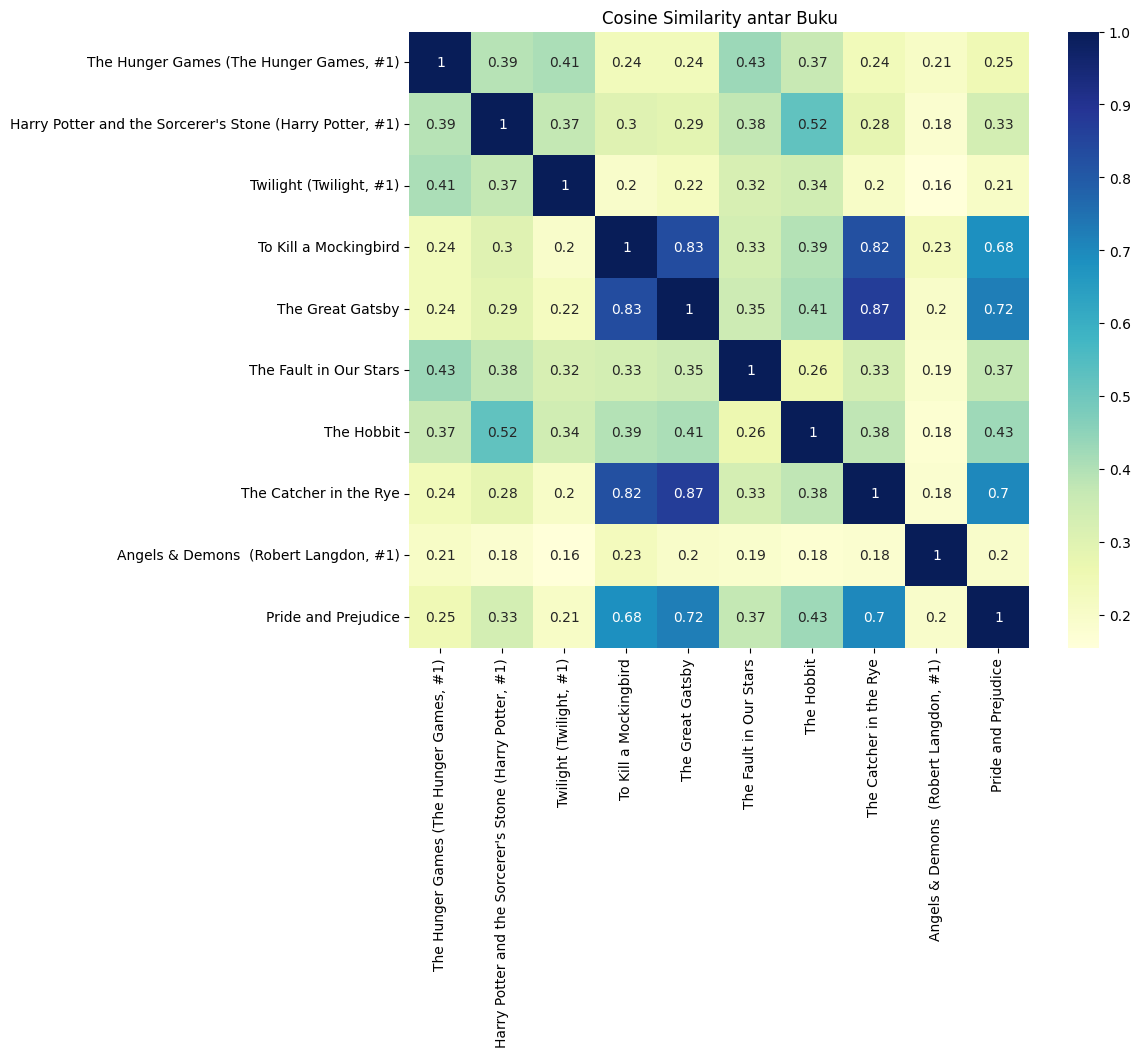

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ambil 10 buku pertama
book_indices = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
similarities = cosine_sim[book_indices][:, book_indices]

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(similarities, annot=True, cmap='YlGnBu', xticklabels=books_cb['title'].iloc[book_indices].values, yticklabels=books_cb['title'].iloc[book_indices].values)
plt.title("Cosine Similarity antar Buku")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

Berdasarkan gambar di atas, kita bisa melihat bagaimana kemiripan antara satu buku dengan buku lainnya. Jika nilai cosine-similarity mendekati 1 maka kedua buku itu semakin mirip dan jika mendekati 0 maka buku semakin tidak mirip.

# Evaluation

## Precision@k, Recall@k, dan MAP@k

Evaluasi ini digunakan untuk menilai seberapa baik sistem rekomendasi dalam memberikan saran buku yang relevan bagi pengguna. Kita menggunakan tiga metrik umum: **Precision@K**, **Recall@K**, dan **Mean Average Precision (MAP@K)**.

### Precision@K
Precision@K mengukur seberapa tepat sistem rekomendasi dalam memberikan buku yang relevan kepada pengguna di antara K buku teratas yang direkomendasikan. Dengan kata lain, ini menghitung seberapa banyak dari K rekomendasi teratas yang benar-benar menarik bagi pengguna. 

Misalkan sistem merekomendasikan 10 buku kepada seorang pengguna. Setelah pengguna melihat daftar tersebut, diketahui bahwa 6 di antaranya adalah buku yang pernah diberi rating tinggi olehnya atau sesuai dengan genre favoritnya. Dalam hal ini, Precision@10 adalah 0.6, yang berarti 60% dari 10 rekomendasi teratas relevan bagi pengguna.

In [41]:
def precision_at_k(user_id, ratings_df, books_df, k=10, threshold=3.0):
    """
    Precision@k: Hitung akurasi rekomendasi untuk 1 user berdasarkan judul buku.
    - Gunakan hanya jika user memiliki setidaknya k buku yang disukai (rating >= threshold)
    - Rekomendasi dihitung hanya jika judul ditemukan & rekomendasi tersedia
    """

    # Ambil buku-buku yang disukai user
    liked = ratings_df[(ratings_df['user_id'] == user_id) & (ratings_df['rating'] >= threshold)]
    liked = liked.merge(books_df[['book_id', 'title']], on='book_id', how='inner')

    # Cek syarat minimal k buku disukai
    if liked.shape[0] < k:
        return None

    # Ambil salah satu buku sebagai input rekomendasi
    for chosen_title in liked['title']:
        if chosen_title in indices:
            recommended = get_recommendations(chosen_title, top_n=k)
            if recommended is not None:
                break
    else:
        return None  # Tidak ada judul dari user yang cocok

    # Judul yang direkomendasikan
    recommended_titles = set(recommended['title'])

    # Judul ground truth (buku lain yang disukai user, selain input)
    true_liked = set(liked['title']) - {chosen_title}

    if not true_liked:
        return None  # Tidak ada ground truth

    # Hitung precision
    hits = len(recommended_titles & true_liked)
    return hits / k


### Recall@K

Recall@K mengukur seberapa lengkap sistem rekomendasi dalam menemukan buku-buku yang relevan bagi pengguna dari seluruh buku relevan yang ada. Ini berfokus pada seberapa banyak buku yang seharusnya disukai pengguna yang berhasil direkomendasikan dalam K teratas. 

Misal seorang pengguna memiliki 20 buku dalam daftar "buku favorit". Sistem rekomendasi memberikan 10 rekomendasi (K=10). Dari 20 buku favorit tersebut, sistem berhasil merekomendasikan 5 buku. Maka, Recall@10 adalah 5/20 = 0.25. Ini berarti sistem hanya berhasil menemukan 25% dari buku-buku favorit pengguna dalam 10 rekomendasi teratas.

In [42]:
def recall_at_k(user_id, ratings_df, books_df, k=10):
    liked_books = ratings_df[(ratings_df['user_id'] == user_id) & (ratings_df['rating'] >= 4.0)]
    liked_titles = books_df[books_df['book_id'].isin(liked_books['book_id'])]['title']

    recommended_titles = set()
    relevant_titles = set(liked_titles)

    for title in relevant_titles:
        recs = get_recommendations(title, top_n=k)
        if recs is not None:
            recommended_titles.update(recs['title'].values)

    if len(relevant_titles) == 0:
        return None

    hits = len(recommended_titles.intersection(relevant_titles))
    recall = hits / len(relevant_titles)
    return recall

### MAP@K (Mean Average Precision)

MAP@K adalah metrik yang mengukur kualitas keseluruhan dari daftar rekomendasi dengan mempertimbangkan baik ketepatan (precision) maupun urutan relevansi buku. Metrik ini memberikan gambaran seberapa baik sistem dalam menempatkan buku-buku yang relevan di posisi teratas daftar rekomendasi.

Misalkan kita memiliki 2 pengguna. Sistem memberikan 5 rekomendasi buku (K=5) untuk masing-masing pengguna.
- Pengguna 1: 2 buku relevan muncul di posisi 1 dan 3.
- Pengguna 2: 1 buku relevan muncul di posisi 2.

MAP@K akan memberikan skor yang lebih tinggi jika buku relevan muncul di posisi 1 dibandingkan dengan posisi 3 atau 2, karena rekomendasi di posisi awal dianggap lebih baik.

In [43]:
def apk(actual, predicted, k=10):
    if not actual:
        return 0.0

    actual_set = set(actual)
    predicted = predicted[:k]

    score = 0.0
    hits = 0.0

    for i, p in enumerate(predicted, start=1):
        if p in actual_set:
            hits += 1.0
            score += hits / i

    return score / min(len(actual), k)

def map_at_k(user_id, ratings_df, books_df, k=10):
    liked_books = ratings_df[(ratings_df['user_id'] == user_id) & (ratings_df['rating'] >= 4.0)]
    liked_titles = books_df[books_df['book_id'].isin(liked_books['book_id'])]['title'].tolist()

    if not liked_titles:
        return None

    all_recs = []
    for title in liked_titles:
        recs = get_recommendations(title, top_n=k)
        if recs is not None:
            all_recs += recs['title'].tolist()

    if not all_recs:
        return None

    return apk(liked_titles, all_recs, k=k)

### Evaluasi Model

In [44]:
from tqdm import tqdm

sample_users = ratings_cb['user_id'].value_counts()
sample_users = sample_users[sample_users >= 15].index[:1000]  # Ambil 1000 user dengan minimal 2 rating

precision_scores = []
recall_scores = []
map_scores = []

for user_id in tqdm(sample_users, desc="Evaluating Precision@K, Recall@K, and MAP@K"):
    precision_score = precision_at_k(user_id, ratings_cb, books_cb, k=10)
    recall_score = recall_at_k(user_id, ratings_cb, books_cb, k=10)
    map_score = map_at_k(user_id, ratings_cb, books_cb, k=10)

    if precision_score is not None:
        precision_scores.append(precision_score)
    if recall_score is not None:
        recall_scores.append(recall_score)
    if map_score is not None:
        map_scores.append(map_score)

# Hasil rata-rata evaluasi
if precision_scores:
    print(f"\n✅ Average Precision@10: {np.mean(precision_scores):.4f} ({len(precision_scores)} users dievaluasi)")
else:
    print("⚠️ Tidak ada user valid untuk evaluasi Precision@10.")

if recall_scores:
    print(f"✅ Average Recall@10: {np.mean(recall_scores):.4f} ({len(recall_scores)} users dievaluasi)")
else:
    print("⚠️ Tidak ada user valid untuk evaluasi Recall@10.")

if map_scores:
    print(f"✅ MAP@10: {np.mean(map_scores):.4f} ({len(map_scores)} users dievaluasi)")
else:
    print("⚠️ Tidak ada user valid untuk evaluasi MAP@10.")

Evaluating Precision@K, Recall@K, and MAP@K: 100%|██████████| 307/307 [01:54<00:00,  2.68it/s]


✅ Average Precision@10: 0.0921 (302 users dievaluasi)
✅ Average Recall@10: 0.2216 (307 users dievaluasi)
✅ MAP@10: 0.0232 (307 users dievaluasi)


Berdasarkan hasil tersebut:
- Nilai Average Precision@10 sebesar 0.0921 menunjukkan bahwa, secara rata-rata, dari 10 buku yang direkomendasikan kepada setiap pengguna, hanya sekitar 9.21% di antaranya yang relevan.
- Nilai Average Recall@10 sebesar 0.2216 berarti bahwa, secara rata-rata, sistem rekomendasi berhasil menemukan sekitar 22.16% dari total buku relevan yang mungkin disukai oleh pengguna dalam 10 rekomendasi teratas.
- Nilai MAP@10 sebesar 0.0232 adalah nilai rata-rata dari Average Precision untuk semua pengguna. Angka ini sangat rendah, mengkonfirmasi temuan dari Precision@10 bahwa sistem kesulitan dalam memberikan rekomendasi yang tepat dan menempatkannya di urutan atas.

## Kualitas Rating

In [45]:
recs = get_recommendations("To Kill a Mockingbird")
recs['average_rating'].describe()

,average_rating
count,10.000000
mean,3.748000
std,0.165449
min,3.370000
25%,3.662500
50%,3.795000
75%,3.862500
max,3.920000


Berdasarkan deskripsi statistiknya, sistem cenderung merekomendasikan buku yang berkualitas (average_rating>3.5)

## Keragaman Rekomendasi

In [46]:
recs['authors'].nunique()

9

Berdasarkan informasi di atas, rekomendasi buku yang diberikan memiliki cukup keragaman. Hal ini bisa dilihat dari bagaimana sistem merekomendasikan buku dari 10 buku yang direkomendasikan 9 di antaranya merupakan penulis yang berbeda.